In [1]:

import warnings
warnings.filterwarnings("ignore")
import os
import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, plot_confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
titanic_df = acquire.get_titanic()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
prepped_titanic= prepare.prep_titanic(titanic_df)
prepped_titanic

,survived,age,sibsp,fare,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,7.2500,0,0,1,0,0,1,0,0,1
1,1,38.0,1,71.2833,0,1,0,1,0,0,1,0,0
2,1,26.0,0,7.9250,1,1,0,0,0,1,0,0,1
3,1,35.0,1,53.1000,0,1,0,1,0,0,0,0,1
4,0,35.0,0,8.0500,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,13.0000,1,0,1,0,1,0,0,0,1
887,1,19.0,0,30.0000,1,1,0,1,0,0,0,0,1
888,0,NaN,1,23.4500,0,1,0,0,0,1,0,0,1
889,1,26.0,0,30.0000,1,0,1,1,0,0,1,0,0


In [4]:
train,validate, test =prepare.split_titanic_data(prepped_titanic)

In [5]:
train, validate, test= prepare.impute_titanic_mode(train, validate, test)

In [6]:
validate.isna().sum()

survived                   0
age                        0
sibsp                      0
fare                       0
alone                      0
sex_female                 0
sex_male                   0
class_First                0
class_Second               0
class_Third                0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

#### Baseline prediction 

In [7]:
train.shape, validate.shape, test.shape

((177, 13), (45, 13), (669, 13))

In [8]:
titanic_df.survived.value_counts() # Baseline is 0 for not survived 

0    549
1    342
Name: survived, dtype: int64

In [9]:
titanic_df['baseline_prediction']= 0

In [10]:
titanic_df.head()

,survived,age,sibsp,fare,alone,baseline_prediction
0,0,22.0,1,7.2500,0,0
1,1,38.0,1,71.2833,0,0
2,1,26.0,0,7.9250,1,0
3,1,35.0,1,53.1000,0,0
4,0,35.0,0,8.0500,1,0


###### Isolating the target variable

In [11]:
X_train = train.drop(columns=['survived'])
y_train = train.survived


In [12]:
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

In [13]:
X_test = test.drop(columns=['survived'])
y_test = test.survived

###### Baseline Accuracy

In [14]:
baseline = y_train.mode() # Baseline is 0 for most occurances 

In [15]:
matches_baseline_prediction = (y_train==0)

In [16]:
baseline_accuracy = matches_baseline_prediction.mean()

In [17]:
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [18]:
#Make The thing
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [19]:
# model.fit(X, y) # Fit the thing

clf = clf.fit(X_train, y_train)

In [20]:
y_predictions = clf.predict(X_train)

In [21]:
# model.fit(X, y) # Fit the thing

clf = clf.fit(X_train, y_train)

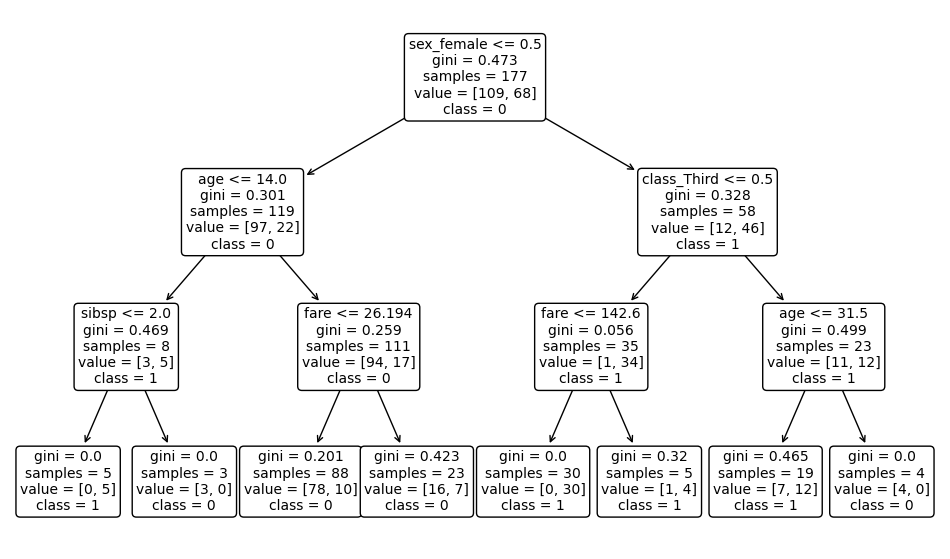

In [22]:
plt.figure(figsize=(12,7))  # set plot size (denoted in inches)
plot_tree(clf, feature_names=X_train.columns, class_names=np.array(clf.classes_).astype('str').tolist(),rounded=True, fontsize=10)
plt.show()

In [23]:
acc = clf.score(X_train, y_train)
acc

0.8587570621468926

In [24]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


###---------------------------------------------

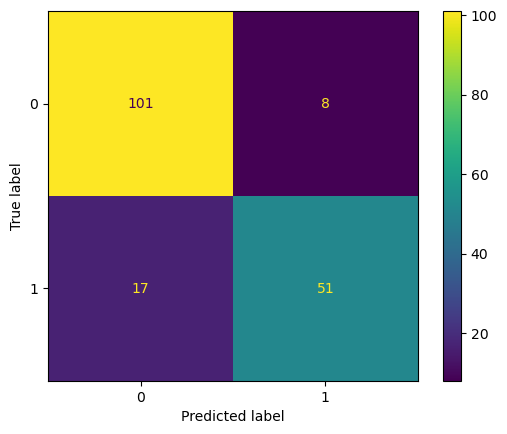

In [25]:
plot_confusion_matrix(clf, X_train, y_train)

In [26]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       109
           1       0.86      0.75      0.80        68

    accuracy                           0.86       177
   macro avg       0.86      0.84      0.85       177
weighted avg       0.86      0.86      0.86       177



In [27]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True) # returning out as dictionary
report

{'0': {'precision': 0.8559322033898306,
  'recall': 0.926605504587156,
  'f1-score': 0.8898678414096917,
  'support': 109},
 '1': {'precision': 0.864406779661017,
  'recall': 0.75,
  'f1-score': 0.8031496062992127,
  'support': 68},
 'accuracy': 0.8587570621468926,
 'macro avg': {'precision': 0.8601694915254238,
  'recall': 0.838302752293578,
  'f1-score': 0.8465087238544522,
  'support': 177},
 'weighted avg': {'precision': 0.8591879728047497,
  'recall': 0.8587570621468926,
  'f1-score': 0.8565523612542535,
  'support': 177}}

In [28]:
#to make this report look more readable- let's turn it into a DataFrame
print("Tree of 1 depth")
pd.DataFrame(report).T

Tree of 1 depth


,precision,recall,f1-score,support
0,0.855932,0.926606,0.889868,109.000000
1,0.864407,0.750000,0.803150,68.000000
accuracy,0.858757,0.858757,0.858757,0.858757
macro avg,0.860169,0.838303,0.846509,177.000000
weighted avg,0.859188,0.858757,0.856552,177.000000


In [29]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(101, 8, 17, 51)

In [30]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 109
Positive Cases: 68
0    109
1     68
Name: survived, dtype: int64


In [31]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

##### V. max_depth value

In [32]:
tree2 = DecisionTreeClassifier(max_depth=4)

In [33]:
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [34]:
for i in range(1, 21):
    # Make the model
    trees = DecisionTreeClassifier(max_depth=i, random_state=123)
    trees = trees.fit(X_train, y_train)
    
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict=True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0          1  accuracy   macro avg  weighted avg
precision    0.815126   0.793103   0.80791    0.804115      0.806665
recall       0.889908   0.676471   0.80791    0.783189      0.807910
f1-score     0.850877   0.730159   0.80791    0.790518      0.804499
support    109.000000  68.000000   0.80791  177.000000    177.000000

Tree with max depth of 2
                    0          1  accuracy   macro avg  weighted avg
precision    0.846847   0.772727  0.819209    0.809787      0.818372
recall       0.862385   0.750000  0.819209    0.806193      0.819209
f1-score     0.854545   0.761194  0.819209    0.807870      0.818682
support    109.000000  68.000000  0.819209  177.000000    177.000000

Tree with max depth of 3
                    0          1  accuracy   macro avg  weighted avg
precision    0.855932   0.864407  0.858757    0.860169      0.859188
recall       0.926606   0.750000  0.858757    0.838303      0.858757
f1-score     0.889868   0.

In [35]:
# overfit // significant differences is probably overfit.
metrics = []

for i in range (1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_validate, y_validate)
    
    output = {"max_depth": i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.807910,0.800000,0.007910
1,2,0.819209,0.822222,-0.003013
2,3,0.858757,0.822222,0.036535
3,4,0.881356,0.844444,0.036911
4,5,0.898305,0.800000,0.098305
5,6,0.915254,0.800000,0.115254
6,7,0.932203,0.777778,0.154426
7,8,0.960452,0.777778,0.182674
8,9,0.977401,0.777778,0.199623
9,10,0.983051,0.777778,0.205273


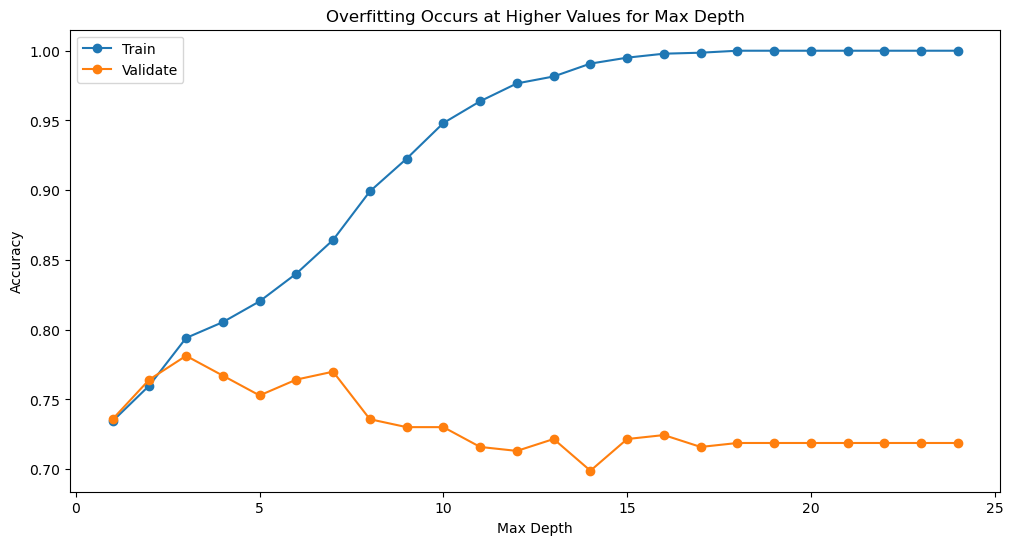

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
3,4,0.881356,0.844444,0.036911
1,2,0.819209,0.822222,-0.003013
2,3,0.858757,0.822222,0.036535
0,1,0.807910,0.800000,0.007910
4,5,0.898305,0.800000,0.098305


### Telco dataset

In [38]:
pd.options.display.max_columns = None

In [39]:
telco_df = acquire.get_telco_data()

In [40]:
telco_df.head()

,Unnamed: 0,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,Yes,2,65.6,593.3,No,One year,1,DSL,2,Mailed check
1,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,No,2,59.9,542.4,No,Month-to-month,1,DSL,2,Mailed check
2,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,Yes,1,73.9,280.85,Yes,Month-to-month,2,Fiber optic,1,Electronic check
3,3,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,Yes,1,98.0,1237.85,Yes,Month-to-month,2,Fiber optic,1,Electronic check
4,4,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,Yes,2,83.9,267.4,Yes,Month-to-month,2,Fiber optic,2,Mailed check


In [41]:
telco_df.head()

,Unnamed: 0,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,Yes,2,65.6,593.3,No,One year,1,DSL,2,Mailed check
1,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,No,2,59.9,542.4,No,Month-to-month,1,DSL,2,Mailed check
2,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,Yes,1,73.9,280.85,Yes,Month-to-month,2,Fiber optic,1,Electronic check
3,3,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,Yes,1,98.0,1237.85,Yes,Month-to-month,2,Fiber optic,1,Electronic check
4,4,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,Yes,2,83.9,267.4,Yes,Month-to-month,2,Fiber optic,2,Mailed check


In [42]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  7043 non-null   int64  
 1   contract_type_id            7043 non-null   int64  
 2   customer_id                 7043 non-null   object 
 3   gender                      7043 non-null   object 
 4   senior_citizen              7043 non-null   int64  
 5   partner                     7043 non-null   object 
 6   dependents                  7043 non-null   object 
 7   tenure                      7043 non-null   int64  
 8   phone_service               7043 non-null   object 
 9   multiple_lines              7043 non-null   object 
 10  internet_service_type_id    7043 non-null   int64  
 11  online_security             7043 non-null   object 
 12  online_backup               7043 non-null   object 
 13  device_protection           7043 

In [43]:
prepped_telco = prepare.prep_telco(telco_df)

In [44]:
prepped_telco.head()

,Unnamed: 0,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type_id,payment_type_id,monthly_charges,total_charges,churn,month_to_month_contract,one_year_contract,two_year_contract,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_No,paperless_billing_Yes,,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,2,1,0,1,1,9,1,1,2,65.6,593.30,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1
1,1,1,0,0,0,0,9,1,1,2,59.9,542.40,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
2,2,1,0,0,0,0,4,1,2,1,73.9,280.85,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,3,1,0,1,1,0,13,1,2,1,98.0,1237.85,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
4,4,1,1,1,1,0,3,1,2,2,83.9,267.40,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1


#### Splitting Telco data

In [45]:
prepped_telco.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [46]:
train, validate, test= prepare.split_telco(prepped_telco)

In [47]:
train.head()

,Unnamed: 0,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type_id,payment_type_id,monthly_charges,total_charges,churn,month_to_month_contract,one_year_contract,two_year_contract,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_No,paperless_billing_Yes,,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4647,4647,1,0,1,0,0,16,1,2,1,69.65,1043.30,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3693,3693,1,0,0,0,0,25,1,2,3,74.30,1952.25,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
6134,6134,2,0,0,1,1,29,1,1,3,69.05,1958.45,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0
4722,4722,1,0,0,1,1,49,1,2,1,99.80,4872.45,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
3551,3551,1,1,0,0,0,1,1,2,2,70.70,70.70,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1


##### Baseline prediction 

In [48]:
train.shape, validate.shape, test.shape

((1408, 46), (352, 46), (5283, 46))

In [49]:
prepped_telco.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [50]:
X_train = train.drop(columns=['churn'])
y_train = train.churn

In [51]:
X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

In [52]:
X_test = test.drop(columns=['churn'])
y_test = test.churn

In [53]:
baseline = y_train.mode()

In [54]:
matches_baseline_prediction = (y_train==0)

In [55]:
baseline_accuracy = matches_baseline_prediction.mean()

In [56]:
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [57]:
clf = clf.fit(X_train, y_train)

In [58]:
y_predictions = clf.predict(X_train)

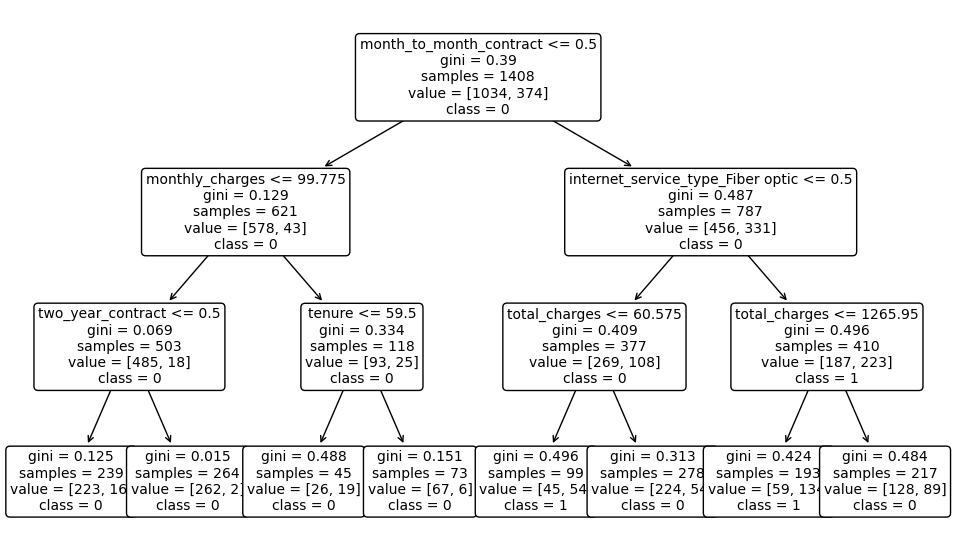

In [60]:
plt.figure(figsize=(12,7))  # set plot size (denoted in inches)
plot_tree(clf, feature_names=X_train.columns, class_names=np.array(clf.classes_).astype('str').tolist(),rounded=True, fontsize=10)
plt.show()

In [61]:
acc = clf.score(X_train, y_train)
acc

0.7940340909090909

In [62]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


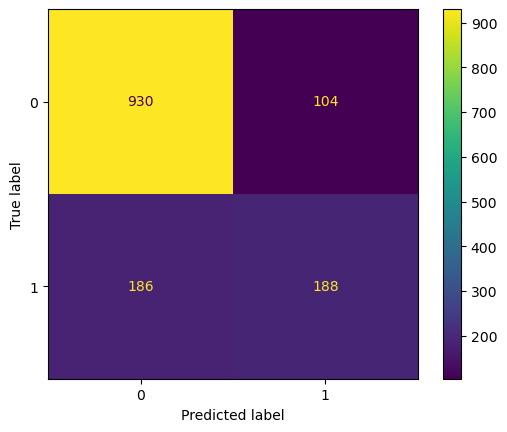

In [63]:
plot_confusion_matrix(clf, X_train, y_train)

In [64]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1034
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1408
   macro avg       0.74      0.70      0.71      1408
weighted avg       0.78      0.79      0.79      1408



In [65]:
report = classification_report(y_train, y_predictions, output_dict=True) # returning out as dictionary
report

{'0': {'precision': 0.8333333333333334,
  'recall': 0.8994197292069632,
  'f1-score': 0.8651162790697674,
  'support': 1034},
 '1': {'precision': 0.6438356164383562,
  'recall': 0.5026737967914439,
  'f1-score': 0.5645645645645645,
  'support': 374},
 'accuracy': 0.7940340909090909,
 'macro avg': {'precision': 0.7385844748858448,
  'recall': 0.7010467629992035,
  'f1-score': 0.714840421817166,
  'support': 1408},
 'weighted avg': {'precision': 0.7829980022831051,
  'recall': 0.7940340909090909,
  'f1-score': 0.7852822299043228,
  'support': 1408}}

In [66]:
print("Tree of 1 depth")
pd.DataFrame(report).T

Tree of 1 depth


,precision,recall,f1-score,support
0,0.833333,0.899420,0.865116,1034.000000
1,0.643836,0.502674,0.564565,374.000000
accuracy,0.794034,0.794034,0.794034,0.794034
macro avg,0.738584,0.701047,0.714840,1408.000000
weighted avg,0.782998,0.794034,0.785282,1408.000000


In [67]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(930, 104, 186, 188)

In [68]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 1034
Positive Cases: 374
0    1034
1     374
Name: churn, dtype: int64


In [69]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

In [70]:
tree2 = DecisionTreeClassifier(max_depth=4)

In [71]:
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [72]:
for i in range(1, 21):
    # Make the model
    trees = DecisionTreeClassifier(max_depth=i, random_state=123)
    trees = trees.fit(X_train, y_train)
    
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict=True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.734375    0.0  0.734375     0.367188      0.539307
recall        1.000000    0.0  0.734375     0.500000      0.734375
f1-score      0.846847    0.0  0.734375     0.423423      0.621903
support    1034.000000  374.0  0.734375  1408.000000   1408.000000

Tree with max depth of 2
                     0           1  accuracy    macro avg  weighted avg
precision     0.848697    0.543902  0.759943     0.696300      0.767736
recall        0.819149    0.596257  0.759943     0.707703      0.759943
f1-score      0.833661    0.568878  0.759943     0.701269      0.763328
support    1034.000000  374.000000  0.759943  1408.000000   1408.000000

Tree with max depth of 3
                     0           1  accuracy    macro avg  weighted avg
precision     0.833333    0.643836  0.794034     0.738584      0.782998
recall        0.899420    0.502674  0.794034     0.701047      0.794034
f1-score    

In [73]:
metrics = []

for i in range (1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_validate, y_validate)
    
    output = {"max_depth": i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734375,0.735795,-0.001420
1,2,0.759943,0.764205,-0.004261
2,3,0.794034,0.781250,0.012784
3,4,0.805398,0.767045,0.038352
4,5,0.820312,0.752841,0.067472
5,6,0.840199,0.764205,0.075994
6,7,0.864347,0.769886,0.094460
7,8,0.899148,0.735795,0.163352
8,9,0.922585,0.730114,0.192472
9,10,0.948153,0.730114,0.218040


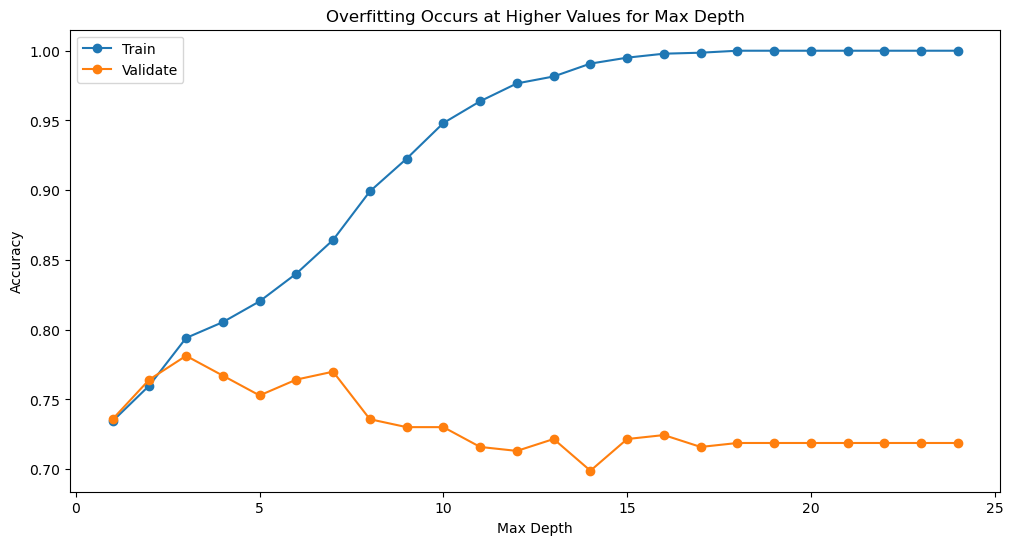

In [76]:
plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.794034,0.781250,0.012784
6,7,0.864347,0.769886,0.094460
3,4,0.805398,0.767045,0.038352
1,2,0.759943,0.764205,-0.004261
5,6,0.840199,0.764205,0.075994
4,5,0.820312,0.752841,0.067472
0,1,0.734375,0.735795,-0.001420
